### Exercise 1

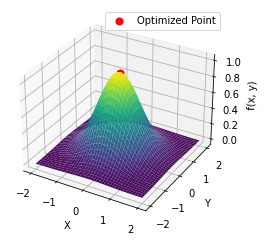

In [11]:
import math
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def f(x, y):
    return math.exp(-(x**2 + y**2))

def hill_climbing():
    x = random.uniform(-2, 2)
    y = random.uniform(-2, 2)
    current_value = f(x, y)

    step_size = 0.1
    max_iterations = 1000
    iteration = 0

    while iteration < max_iterations:
        neighbors = [(x + step_size, y), (x - step_size, y),
                     (x, y + step_size), (x, y - step_size)]
        neighbor_values = [f(nx, ny) for nx, ny in neighbors]
        max_neighbor_value = max(neighbor_values)

        if max_neighbor_value > current_value:
            index = neighbor_values.index(max_neighbor_value)
            x, y = neighbors[index]
            current_value = max_neighbor_value
            iteration += 1
        else:
            break

    return x, y, current_value

# Run the hill climbing algorithm
best_x, best_y, max_value = hill_climbing()

# Plot the function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_vals = y_vals = np.linspace(-2, 2, 41)
X, Y = np.meshgrid(x_vals, y_vals)
Z = np.exp(-(X**2 + Y**2))

ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')

# Plot the optimized point
ax.scatter(best_x, best_y, max_value, color='red', s=50, label='Optimized Point')
ax.legend()
plt.show()

Best x: 0.04694955158578917
Best y: 101.25381590202113
Best z: 1992.5297626063834
Max value: 1027182.3240704496


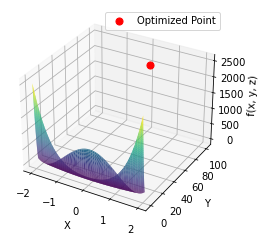

In [13]:
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x, y, z):
    return (1 - x)**2 + 100 * (y - x**2)**2 + z

def hill_climbing():
    x = random.uniform(-2, 2)
    y = random.uniform(-1, 3)
    z = random.uniform(0, 2500)
    current_value = f(x, y, z)

    step_size = 0.1
    max_iterations = 1000
    iteration = 0

    while iteration < max_iterations:
        neighbors = [(x + step_size, y, z), (x - step_size, y, z),
                     (x, y + step_size, z), (x, y - step_size, z),
                     (x, y, z + step_size), (x, y, z - step_size)]
        neighbor_values = [f(nx, ny, nz) for nx, ny, nz in neighbors]
        max_neighbor_value = max(neighbor_values)

        if max_neighbor_value > current_value:
            index = neighbor_values.index(max_neighbor_value)
            x, y, z = neighbors[index]
            current_value = max_neighbor_value
            iteration += 1
        else:
            break

    return x, y, z, current_value

# Run the hill climbing algorithm
best_x, best_y, best_z, max_value = hill_climbing()

# Print the results
print("Best x:", best_x)
print("Best y:", best_y)
print("Best z:", best_z)
print("Max value:", max_value)

# Create a 3D figure to visualize the function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y, 0)

ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y, z)')

# Plot the optimized point
ax.scatter(best_x, best_y, best_z, color='red', s=50, label='Optimized Point')
ax.legend()

plt.show()

### Exercise 2

Optimal Solution:
x = 8.270466689323301
y = -4.883761786115206
f(x, y) = 537112.9102054689


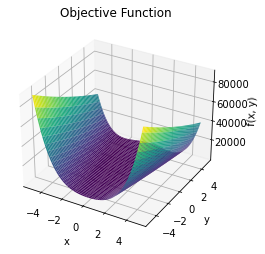

In [17]:
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the objective function
def objective_function(x, y):
    return (1 - x)**2 + 100*(y - x**2)**2

# GA parameters
population_size = 100
num_generations = 50
mutation_rate = 0.1

# Define the search space
x_min, x_max = -5, 5
y_min, y_max = -5, 5

# Generate initial population
population = []
for _ in range(population_size):
    genotype = [random.uniform(x_min, x_max), random.uniform(y_min, y_max)]
    population.append(genotype)

# Perform GA iterations
best_fitness = []
for generation in range(num_generations):
    # Calculate fitness for each genotype
    fitness_values = [objective_function(genotype[0], genotype[1]) for genotype in population]

    # Select individuals for crossover
    selected_indices = np.random.choice(range(population_size), size=population_size, p=(fitness_values / np.sum(fitness_values)))
    selected_population = [population[i] for i in selected_indices]

    # Create offspring through crossover
    offspring = []
    for i in range(population_size):
        parent1, parent2 = random.choice(selected_population), random.choice(selected_population)
        child = [parent1[0], parent2[1]]  # Perform crossover between x and y
        offspring.append(child)

    # Apply mutation to the offspring
    for i in range(population_size):
        if random.random() < mutation_rate:
            offspring[i][0] += random.uniform(-0.5, 0.5)  # Mutate x
            offspring[i][1] += random.uniform(-0.5, 0.5)  # Mutate y

    # Replace the old population with the offspring
    population = offspring

    # Record the best fitness value in each generation
    best_fitness.append(min(fitness_values))

# Extract the optimal solution
best_genotype = population[np.argmin(fitness_values)]
optimal_x, optimal_y = best_genotype[0], best_genotype[1]
optimal_fitness = objective_function(optimal_x, optimal_y)

# Print the optimal solution
print("Optimal Solution:")
print("x =", optimal_x)
print("y =", optimal_y)
print("f(x, y) =", optimal_fitness)

# Generate 3D figure
x_vals = np.linspace(x_min, x_max, 100)
y_vals = np.linspace(y_min, y_max, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = objective_function(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.title('Objective Function')
plt.show()

Optimal Solution:
x = 0.04393079826943569
y = 0.011131149202158186
f(x, y) = 0.9979482901209008


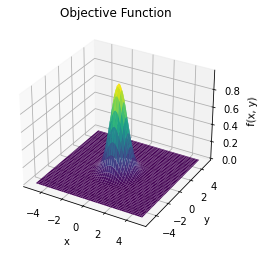

In [19]:
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the objective function
def objective_function(x, y):
    return np.exp(-(x**2 + y**2))

# GA parameters
population_size = 100
num_generations = 50
mutation_rate = 0.1

# Define the search space
x_min, x_max = -5, 5
y_min, y_max = -5, 5

# Generate initial population
population = []
for _ in range(population_size):
    genotype = [random.uniform(x_min, x_max), random.uniform(y_min, y_max)]
    population.append(genotype)

# Perform GA iterations
best_fitness = []
for generation in range(num_generations):
    # Calculate fitness for each genotype
    fitness_values = [objective_function(genotype[0], genotype[1]) for genotype in population]

    # Select individuals for crossover
    selected_indices = np.random.choice(range(population_size), size=population_size, p=(fitness_values / np.sum(fitness_values)))
    selected_population = [population[i] for i in selected_indices]

    # Create offspring through crossover
    offspring = []
    for i in range(population_size):
        parent1, parent2 = random.choice(selected_population), random.choice(selected_population)
        child = [parent1[0], parent2[1]]  # Perform crossover between x and y
        offspring.append(child)

    # Apply mutation to the offspring
    for i in range(population_size):
        if random.random() < mutation_rate:
            offspring[i][0] += random.uniform(-0.5, 0.5)  # Mutate x
            offspring[i][1] += random.uniform(-0.5, 0.5)  # Mutate y

    # Replace the old population with the offspring
    population = offspring

    # Record the best fitness value in each generation
    best_fitness.append(max(fitness_values))

# Extract the optimal solution
best_genotype = population[np.argmax(fitness_values)]
optimal_x, optimal_y = best_genotype[0], best_genotype[1]
optimal_fitness = objective_function(optimal_x, optimal_y)

# Print the optimal solution
print("Optimal Solution:")
print("x =", optimal_x)
print("y =", optimal_y)
print("f(x, y) =", optimal_fitness)

# Generate 3D figure
x_vals = np.linspace(x_min, x_max, 100)
y_vals = np.linspace(y_min, y_max, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = objective_function(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.title('Objective Function')
plt.show()